## Loading the Data

In [4]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

In [6]:
student_demographics = pd.read_csv('studentInfo.csv')

In [7]:
student_demographics.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [8]:
student_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [9]:
student_interaction = pd.read_csv('studentVle.csv')

In [10]:
student_interaction.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [11]:
student_interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [12]:
student_interaction.drop('id_site' , axis =1, inplace = True)

In [13]:
student_interaction = student_interaction.groupby(['id_student']).sum()

In [14]:
student_interaction

,date,sum_click
id_student,,
6516,73140,2791
8462,11287,656
11391,20018,934
23629,2539,161
23698,26120,910
...,...,...
2698251,42240,1511
2698257,25114,758
2698535,63531,4241


In [15]:
student_info = pd.merge(student_interaction, student_demographics, on = 'id_student', how = 'inner')

In [16]:
student_info.head()

,id_student,date,sum_click,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,6516,73140,2791,AAA,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass
1,8462,11287,656,DDD,2013J,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
2,8462,11287,656,DDD,2014J,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn
3,11391,20018,934,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
4,23629,2539,161,BBB,2013B,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail


In [17]:
#Exploring the target variable column
student_info['final_result'].value_counts()

Pass           12358
Withdrawn       7640
Fail            6719
Distinction     3024
Name: final_result, dtype: int64

In [18]:
#Removing student records who unregistered from the course
student_info.drop(student_info[student_info['final_result'] == 'Withdrawn'].index, inplace = True)

In [19]:
#Converting target variable column for analysis
def result_converter(result):
    if result == 'Pass' or result == 'Distinction':
        return 1
    else:
        return 0

In [20]:
student_info['final_result'] = student_info['final_result'].apply(result_converter)

In [21]:
student_info

,id_student,date,sum_click,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,6516,73140,2791,AAA,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,1
3,11391,20018,934,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,1
4,23629,2539,161,BBB,2013B,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,0
5,23698,26120,910,CCC,2014J,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,120,N,1
6,23798,33601,590,BBB,2013J,M,Wales,A Level or Equivalent,50-60%,0-35,0,60,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29735,2698251,42240,1511,DDD,2014B,F,South West Region,A Level or Equivalent,50-60%,0-35,0,60,N,0
29736,2698257,25114,758,AAA,2013J,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,1
29738,2698535,63531,4241,EEE,2013J,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,1
29739,2698577,21818,717,BBB,2014J,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,0


In [22]:
student_info.drop('id_student', axis = 1, inplace = True)

In [23]:
#student_info.to_csv('StudentInformation.csv',  index=False)

## Dealing With Missing Values And Duplicates

In [24]:
#Checking to see if there are any duplicates in the dataset
student_info[student_info.duplicated()]

,date,sum_click,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result


<AxesSubplot:>

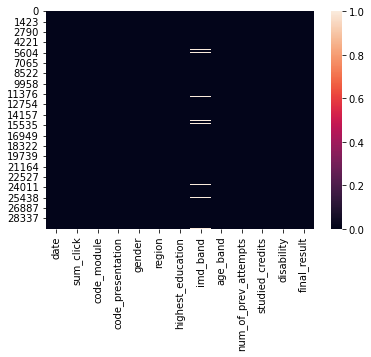

In [25]:
#Visualising rows with null values on a heatmap
sns.heatmap(student_info.isnull())

In [26]:
#Dropping rows containing null values
student_info.dropna(inplace = True)

<AxesSubplot:>

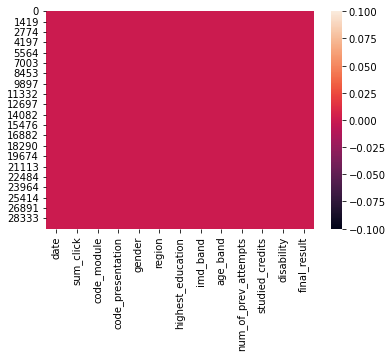

In [27]:
#Checking to see that the rows with null values were successfully dropped.
sns.heatmap(student_info.isnull())

## Outlier Detection 

In [28]:
student_info.describe()

,date,sum_click,num_of_prev_attempts,studied_credits,final_result
count,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000
mean,49342.156712,1852.766557,0.152803,74.494819,0.690155
std,52134.448328,2158.361204,0.464192,36.839657,0.462440
min,-3043.000000,1.000000,0.000000,30.000000,0.000000
25%,13018.250000,462.000000,0.000000,60.000000,0.000000
50%,34067.500000,1131.000000,0.000000,60.000000,1.000000
75%,68841.000000,2500.750000,0.000000,90.000000,1.000000
max,667275.000000,28615.000000,6.000000,630.000000,1.000000


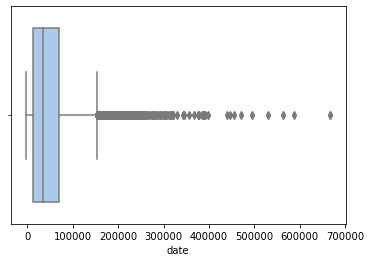

In [29]:
#Checking numerical columns for outliers
sns.boxplot( x=student_info["date"], palette ='pastel')
plt.show()

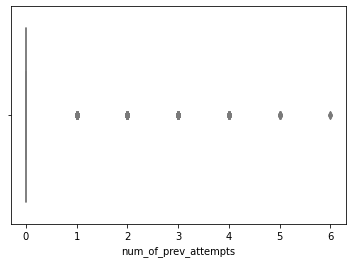

In [30]:
sns.boxplot( x=student_info["num_of_prev_attempts"] , palette ='pastel')
plt.show()

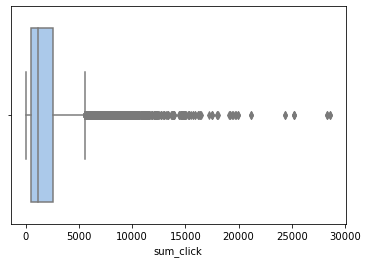

In [31]:
sns.boxplot( x=student_info["sum_click"], palette ='pastel')
plt.show()

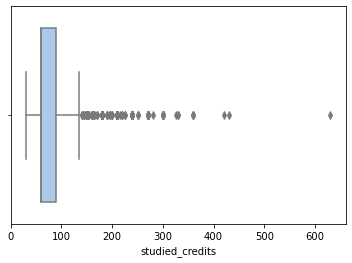

In [32]:
sns.boxplot( x=student_info["studied_credits"], palette ='pastel')
plt.show()

In [33]:
student_info["studied_credits"].quantile(0.99)

180.0

In [34]:
student_info[student_info["studied_credits"]>180]

,date,sum_click,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
3,20018,934,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,1
219,91916,1957,CCC,2014J,M,West Midlands Region,A Level or Equivalent,90-100%,0-35,0,270,N,1
336,172829,7467,FFF,2013B,M,Scotland,HE Qualification,70-80%,35-55,2,270,N,0
358,12274,270,BBB,2013B,F,South East Region,HE Qualification,70-80%,35-55,0,240,N,1
487,53334,2284,FFF,2013J,M,East Midlands Region,A Level or Equivalent,40-50%,0-35,1,220,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29364,41745,927,DDD,2013J,F,South West Region,Lower Than A Level,80-90%,0-35,1,210,N,1
29522,43602,1654,FFF,2013J,M,London Region,HE Qualification,50-60%,35-55,0,240,N,1
29629,13961,260,BBB,2014B,F,South East Region,Lower Than A Level,10-20,0-35,0,250,N,1
29691,62,34,BBB,2014B,F,Yorkshire Region,Lower Than A Level,10-20,0-35,3,270,N,0


In [35]:
#Removing the rows which contain outliers in the studied credits column
student_info = student_info.drop(student_info[student_info["studied_credits"]>180].index)

## Exploratory Data Analysis

<AxesSubplot:xlabel='final_result', ylabel='count'>

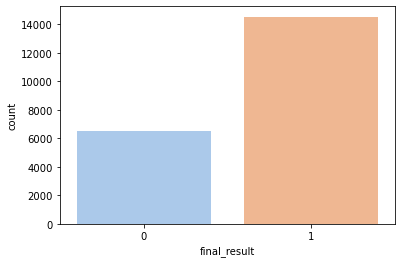

In [36]:
#Visualising the target variable(Final Results)
sns.countplot(x='final_result',data=student_info, palette ='pastel')

<AxesSubplot:>

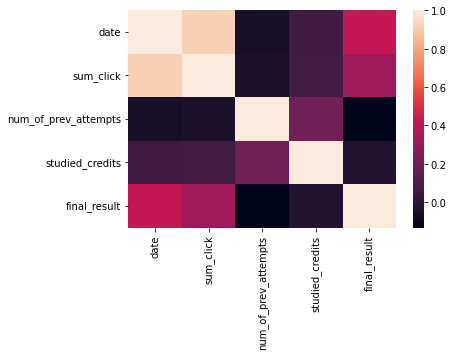

In [37]:
sns.heatmap(student_info.corr())

<AxesSubplot:xlabel='gender', ylabel='count'>

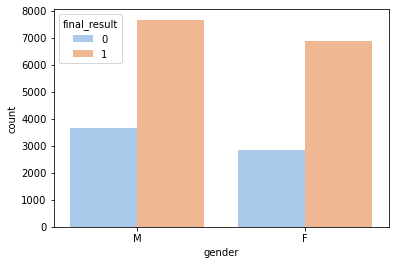

In [38]:
#Visualizing categorical variables 
sns.countplot(x='gender',hue='final_result',data=student_info, palette ='pastel')

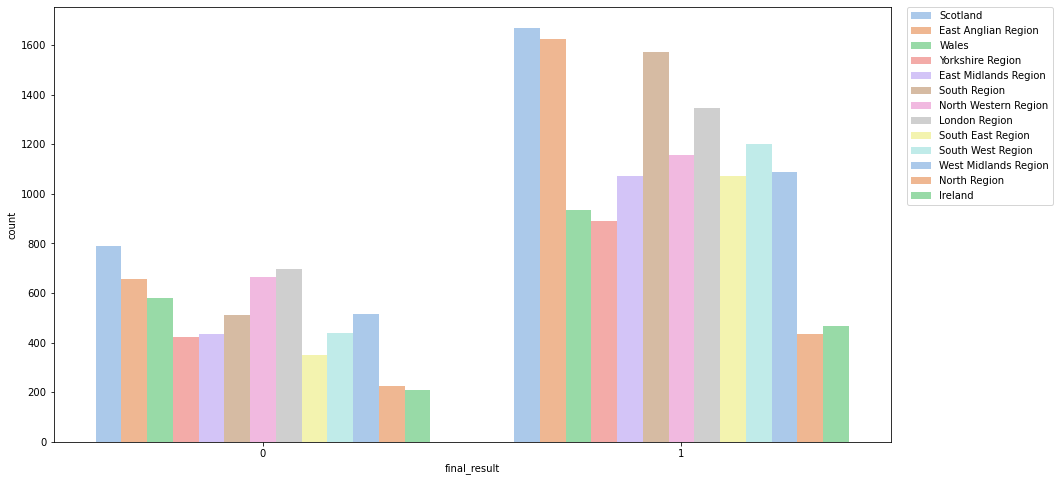

In [39]:
#Visualizing success and falure based on region of student
plt.figure(figsize = (15,8))
sns.countplot(x='final_result',hue='region',data=student_info, palette ='pastel')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='final_result', ylabel='count'>

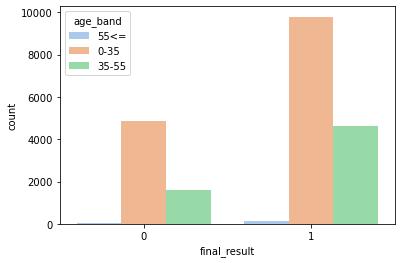

In [40]:
sns.countplot(x='final_result',hue='age_band',data=student_info, palette ='pastel')

<AxesSubplot:xlabel='count', ylabel='highest_education'>

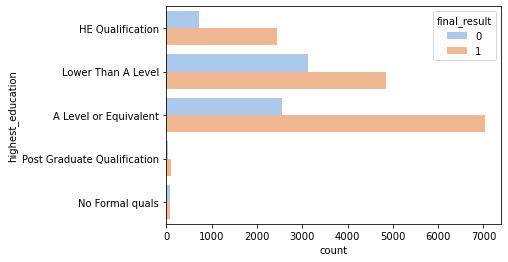

In [41]:
sns.countplot(y='highest_education',hue='final_result',data=student_info, palette ='pastel')

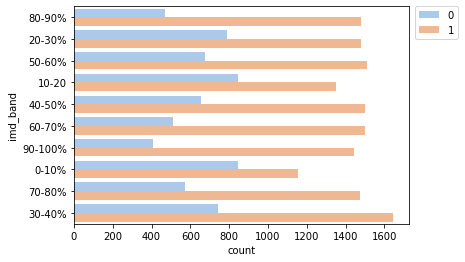

In [42]:
sns.countplot(y='imd_band',hue='final_result',data=student_info, palette ='pastel')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## Handling Categorical Data

In [43]:
#Encoding categorical variables that have order
education = ['No Formal quals', 'Lower Than A Level', 'A Level or Equivalent', 'HE Qualification', 'Post Graduate Qualification' ]
imd = ['0-10%', '10-20', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%' , '80-90%', '90-100%']
age = ['0-35', '35-55', '55<=']

ordinal_categories = [education, imd, age]
oe = OrdinalEncoder(categories= ordinal_categories)
ordinals = oe.fit_transform( student_info[['highest_education', 'imd_band', 'age_band']])

In [44]:
ordinals

array([[3., 8., 2.],
       [1., 2., 0.],
       [2., 5., 0.],
       ...,
       [1., 5., 0.],
       [1., 5., 1.],
       [3., 3., 0.]])

In [45]:
#Encoding categorical variables without order using one hot encoder
enc = OneHotEncoder(drop = 'first')
onehots = enc.fit_transform(student_info[['code_module','code_presentation','gender','region','disability']]).toarray()


In [46]:
enc.categories_

[array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object),
 array(['2013B', '2013J', '2014B', '2014J'], dtype=object),
 array(['F', 'M'], dtype=object),
 array(['East Anglian Region', 'East Midlands Region', 'Ireland',
        'London Region', 'North Region', 'North Western Region',
        'Scotland', 'South East Region', 'South Region',
        'South West Region', 'Wales', 'West Midlands Region',
        'Yorkshire Region'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [47]:
cols = []

for i in enc.categories_:
    i = np.delete(i,0)
    cols.extend(i)

In [48]:
cols

['BBB',
 'CCC',
 'DDD',
 'EEE',
 'FFF',
 'GGG',
 '2013J',
 '2014B',
 '2014J',
 'M',
 'East Midlands Region',
 'Ireland',
 'London Region',
 'North Region',
 'North Western Region',
 'Scotland',
 'South East Region',
 'South Region',
 'South West Region',
 'Wales',
 'West Midlands Region',
 'Yorkshire Region',
 'Y']

In [49]:
    
student_info = pd.concat([pd.DataFrame(onehots, columns=cols), student_info.reset_index(drop = True)], axis = 1)


In [50]:
student_info

,BBB,CCC,DDD,EEE,FFF,GGG,2013J,2014B,2014J,M,...,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2014J,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2013B,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2014J,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,120,N,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2013J,M,Wales,A Level or Equivalent,50-60%,0-35,0,60,N,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2014B,F,Yorkshire Region,Lower Than A Level,10-20,0-35,0,30,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21031,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2014B,F,South West Region,A Level or Equivalent,50-60%,0-35,0,60,N,0
21032,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2013J,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,1
21033,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2013J,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,1
21034,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2014J,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,0


In [51]:
student_info = pd.concat([pd.DataFrame(ordinals, columns=['education', 'imd', 'age']), student_info.reset_index(drop = True)], axis = 1)

In [52]:
student_info = student_info.drop(['code_module','code_presentation','gender','region','disability','highest_education', 'imd_band', 'age_band'], axis = 1)

In [53]:
student_info

,education,imd,age,BBB,CCC,DDD,EEE,FFF,GGG,2013J,...,South West Region,Wales,West Midlands Region,Yorkshire Region,Y,date,sum_click,num_of_prev_attempts,studied_credits,final_result
0,3.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,73140,2791,0,60,1
1,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2539,161,2,60,0
2,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26120,910,0,120,1
3,2.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,33601,590,0,60,1
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,10675,184,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21031,2.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,42240,1511,0,60,0
21032,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,25114,758,0,120,1
21033,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,63531,4241,0,60,1
21034,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,21818,717,0,60,0


## Preparing For Machine Learning

In [54]:
# Seperating the data into features and traget variable
X = student_info.drop('final_result', axis = 1)
y = student_info['final_result']

In [55]:
#Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , stratify = y, random_state = 0)

In [56]:
#Creating an instance of the Standard Scaler
scaler = StandardScaler()

In [57]:
#Scaling the numerical variables of the training set
X_train_s = scaler.fit_transform(X_train)

In [58]:
#Scaling the test set
X_test_s = scaler.transform(X_test)

In [59]:
X_train_s

array([[ 0.31712591, -0.49300615, -0.64580587, ...,  0.5539239 ,
        -0.32584068, -0.39640228],
       [ 0.31712591, -1.20392184, -0.64580587, ..., -0.28328024,
        -0.32584068, -0.39640228],
       [ 0.31712591,  0.57336738, -0.64580587, ..., -0.71458121,
        -0.32584068,  1.43037921],
       ...,
       [-1.05147872,  0.92882523, -0.64580587, ..., -0.66332381,
        -0.32584068, -0.39640228],
       [-1.05147872,  1.28428307,  1.43960892, ..., -0.11288403,
        -0.32584068,  3.25716069],
       [-1.05147872,  1.28428307, -0.64580587, ..., -0.52756098,
         1.84323887, -0.39640228]])

In [60]:
#checking the number of rows and columns in the train set.
X_train_s.shape

(14725, 30)

In [61]:
logr = LogisticRegression()

In [62]:
rfecv = RFECV(estimator=logr, cv=3, step= 1, scoring='accuracy') 

X_train_fs = rfecv.fit_transform(X_train_s, y_train) 
X_test_fs = rfecv.transform(X_test_s) 

print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 4


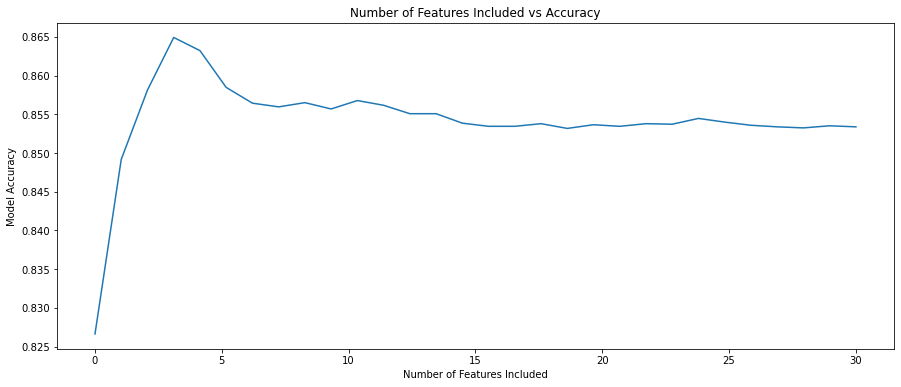

In [63]:
plt.figure( figsize=(15, 6)) 
plt.title('Number of Features Included vs Accuracy') 
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy') 
plt.plot(np.linspace(0,30,30), rfecv.cv_results_['mean_test_score']) 
plt.show()

In [64]:
logr.fit(X_train_fs, y_train)

LogisticRegression()

In [65]:
# Accuracy Score
score = logr.score(X_test_fs, y_test)
print('Logistic Regression Model Accuracy', score)

Logistic Regression Model Accuracy 0.8708604024718745


In [66]:
predictions = logr.predict(X_test_fs)

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1951
           1       0.89      0.93      0.91      4360

    accuracy                           0.87      6311
   macro avg       0.86      0.83      0.84      6311
weighted avg       0.87      0.87      0.87      6311



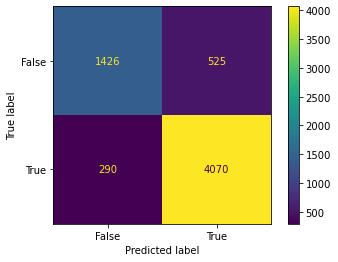

In [68]:
confusion_matrix = metrics.confusion_matrix(y_test,predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

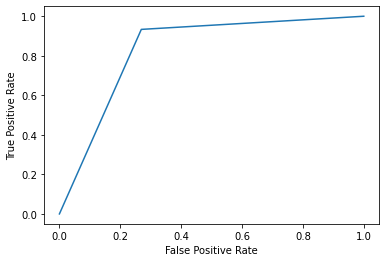

In [69]:
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [70]:
#do roc, auc and confusion matrix visualization

# Neural Network

In [71]:
model = tf.keras.models.Sequential()

In [72]:
model.add(tf.keras.layers.Dense(15, activation = 'relu', input_shape=(30,)))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [73]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',  metrics = ['accuracy'])

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                465       
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(X_train_s, y_train, batch_size = 32, epochs= 50, verbose=2, validation_split=0.3)

Epoch 1/50
323/323 - 3s - loss: 0.5570 - accuracy: 0.7204 - val_loss: 0.5003 - val_accuracy: 0.7585 - 3s/epoch - 9ms/step
Epoch 2/50
323/323 - 1s - loss: 0.4676 - accuracy: 0.7879 - val_loss: 0.4592 - val_accuracy: 0.7881 - 1s/epoch - 5ms/step
Epoch 3/50
323/323 - 1s - loss: 0.4336 - accuracy: 0.8116 - val_loss: 0.4340 - val_accuracy: 0.8074 - 1s/epoch - 4ms/step
Epoch 4/50
323/323 - 1s - loss: 0.4111 - accuracy: 0.8224 - val_loss: 0.4180 - val_accuracy: 0.8171 - 1s/epoch - 4ms/step
Epoch 5/50
323/323 - 1s - loss: 0.3944 - accuracy: 0.8323 - val_loss: 0.4038 - val_accuracy: 0.8234 - 1s/epoch - 4ms/step
Epoch 6/50
323/323 - 1s - loss: 0.3816 - accuracy: 0.8414 - val_loss: 0.3935 - val_accuracy: 0.8291 - 1s/epoch - 4ms/step
Epoch 7/50
323/323 - 1s - loss: 0.3716 - accuracy: 0.8489 - val_loss: 0.3858 - val_accuracy: 0.8359 - 1s/epoch - 4ms/step
Epoch 8/50
323/323 - 1s - loss: 0.3640 - accuracy: 0.8505 - val_loss: 0.3798 - val_accuracy: 0.8373 - 1s/epoch - 4ms/step
Epoch 9/50
323/323 - 1s 

In [76]:
accuracy = history.history['accuracy'] 
validation_accuracy = history.history['val_accuracy'] 

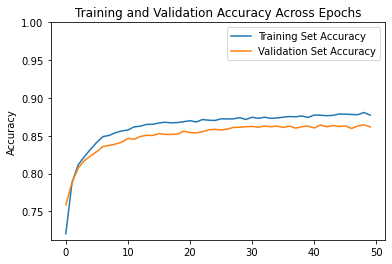

In [77]:
plt.plot(accuracy, label='Training Set Accuracy') 
plt.plot(validation_accuracy, label='Validation Set Accuracy') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

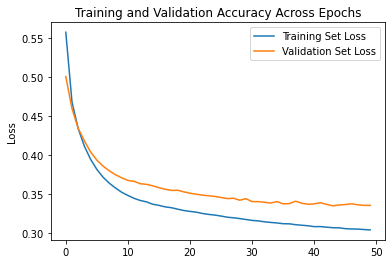

In [78]:
loss = history.history['loss'] 
validation_loss = history.history['val_loss'] 

plt.plot(loss, label='Training Set Loss') 
plt.plot(validation_loss, label='Validation Set Loss') 
plt.ylabel('Loss') 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

In [79]:
ypred = (model.predict(X_test_s) > 0.5).astype('int32')
ypred = ypred[:,0]
ypred

198/198 [==============================] - 1s 2ms/step


array([1, 1, 1, ..., 1, 1, 1])

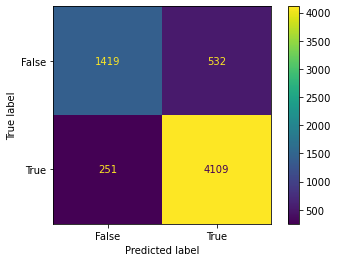

In [80]:
confusion_matrix = metrics.confusion_matrix(y_test,ypred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [81]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78      1951
           1       0.89      0.94      0.91      4360

    accuracy                           0.88      6311
   macro avg       0.87      0.83      0.85      6311
weighted avg       0.87      0.88      0.87      6311



## Random Forests

In [82]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_fs, y_train)

RandomForestClassifier()

In [83]:
predict = rf.predict(X_test_fs)

In [84]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      1951
           1       0.87      0.93      0.90      4360

    accuracy                           0.86      6311
   macro avg       0.85      0.81      0.83      6311
weighted avg       0.86      0.86      0.86      6311

